# Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading data and pre-processing

In [2]:
file_path = '/home/jaimin/Downloads/kaggle/ipl/matches.csv'
df = pd.read_csv(file_path)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
print df.shape
print df.columns
df.dtypes

(636, 18)
Index([u'id', u'season', u'city', u'date', u'team1', u'team2', u'toss_winner',
       u'toss_decision', u'result', u'dl_applied', u'winner', u'win_by_runs',
       u'win_by_wickets', u'player_of_match', u'venue', u'umpire1', u'umpire2',
       u'umpire3'],
      dtype='object')


id                   int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

In [4]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [5]:
df.drop(['id','umpire3'],axis=1,inplace=True)

In [6]:
df.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)

# Basic analysis

In [7]:
all_teams = np.unique(df['team1'])
print all_teams

['Chennai Super Kings' 'Deccan Chargers' 'Delhi Daredevils'
 'Gujarat Lions' 'Kings XI Punjab' 'Kochi Tuskers Kerala'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Pune Warriors'
 'Rajasthan Royals' 'Rising Pune Supergiants'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad']


In [8]:
all_city = np.unique(df['city'])
all_city = all_city[7:]
print all_city

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bloemfontein' 'Cape Town'
 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi' 'Dharamsala'
 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur' 'Johannesburg'
 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mumbai' 'Nagpur' 'Port Elizabeth'
 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah' 'Visakhapatnam']


In [9]:
all_stadium = np.unique(df['venue'])
print all_stadium

['Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Green Park' 'Himachal Pradesh Cricket Association Stadium'
 'Holkar Cricket Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New Wanderers Stadium' 'Newlands' 'OUTsurance Oval'
 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Punjab Cricket Association Stadium, Mohali'
 'Rajiv Gandhi International Stadium, Uppal'
 'Sardar Patel Stadium, Motera' 'Saurashtra Cricket Association Stadium'
 'Sawai Mansingh Stadium'
 'Shaheed Veer Narayan Singh International Stadium'
 'Sharjah Cricket Stadium' 'Sheikh Zayed Stadium' "St George's Park"
 'Subrata Roy Sahara Stadium' 'SuperSport Park'
 'Vidarbha Cricket Association Stadium, 

In [10]:
all_umpires = set(df['umpire1']).union(set(df['umpire2']))
all_umpires = sorted(list(all_umpires))
all_umpires = all_umpires[1:]
print all_umpires

['A Deshmukh', 'A Nand Kishore', 'AK Chaudhary', 'AL Hill', 'AM Saheba', 'AV Jayaprakash', 'AY Dandekar', 'Aleem Dar', 'Asad Rauf', 'BF Bowden', 'BG Jerling', 'BNJ Oxenford', 'BR Doctrove', 'C Shamshuddin', 'CB Gaffaney', 'CK Nandan', 'DJ Harper', 'GA Pratapkumar', 'GAV Baxter', 'HDPK Dharmasena', 'I Shivram', 'IL Howell', 'JD Cloete', 'K Bharatan', 'K Hariharan', 'K Srinath', 'K Srinivasan', 'KN Ananthapadmanabhan', 'M Erasmus', 'MR Benson', 'NJ Llong', 'Nitin Menon', 'PG Pathak', 'PR Reiffel', 'RB Tiffin', 'RE Koertzen', 'RJ Tucker', 'RK Illingworth', 'RM Deshpande', 'S Asnani', 'S Das', 'S Ravi', 'SD Fry', 'SD Ranade', 'SJ Davis', 'SJA Taufel', 'SK Tarapore', 'SL Shastri', 'SS Hazare', 'Subroto Das', 'TH Wijewardene', 'VA Kulkarni', 'VK Sharma', 'YC Barde']


In [11]:
print "Total matches played : {}\n".format(df.shape[0])
print "Number of different cities : {}\n".format(len(all_city))
print "Number of different venues : {}\n".format(len(all_stadium))
print "Total umpires : {}".format(len(all_umpires))

Total matches played : 636

Number of different cities : 30

Number of different venues : 35

Total umpires : 54


In [12]:
df = df[df['result'] != 'no result']
df.shape

(633, 16)

# Different umpires

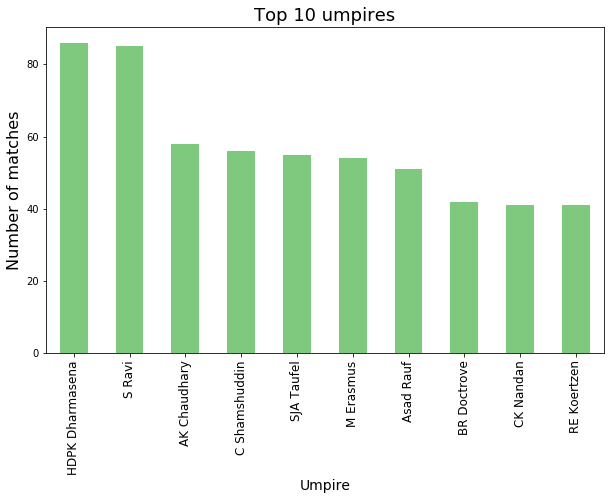

In [13]:
df_umpires = pd.concat([df['umpire1'], df['umpire2']]) 
df_umpires.value_counts().head(10).plot.bar(figsize=(10,6),colormap='Accent')

plt.xticks(fontsize=12)
plt.xlabel('Umpire',fontsize=14)
plt.ylabel('Number of matches',fontsize=16)
plt.title('Top 10 umpires',fontsize=18)

# Matches played at different stadiums

Number of matches played at different stadiums :

M Chinnaswamy Stadium                                   64
Eden Gardens                                            61
Feroz Shah Kotla                                        59
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Maharashtra Cricket Association Stadium                 15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabou

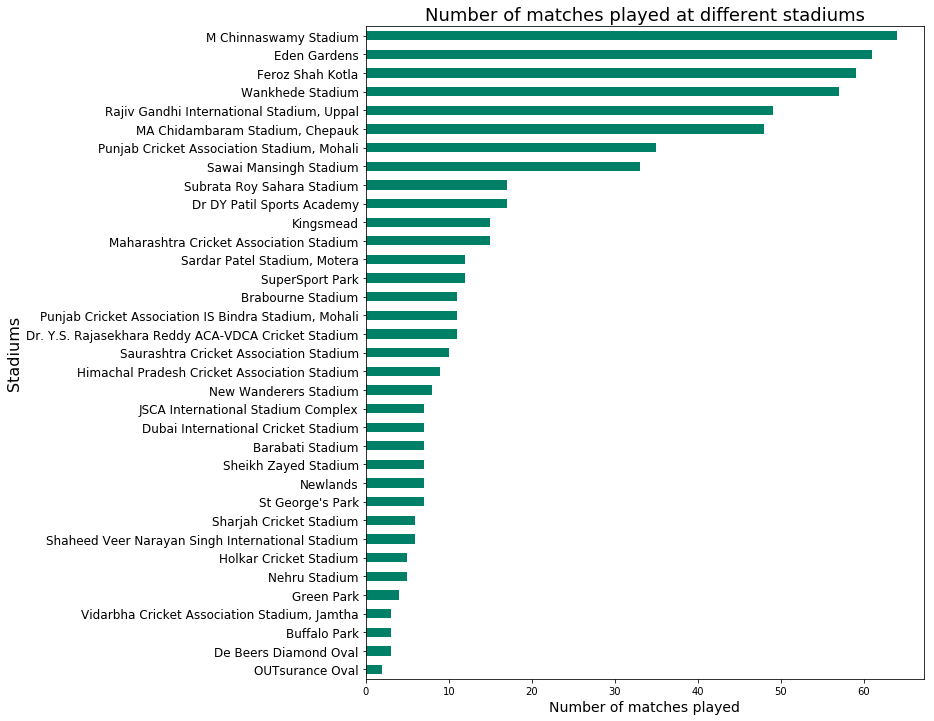

In [14]:
df_stadium = df['venue'].value_counts()
print "Number of matches played at different stadiums :\n\n{}\n".format(df_stadium)

df_stadium.sort_values(ascending=True).plot.barh(figsize=(10,12), colormap='summer')

plt.yticks(fontsize=12)
plt.xlabel('Number of matches played',fontsize=14)
plt.ylabel('Stadiums',fontsize=16)
plt.title('Number of matches played at different stadiums',fontsize=18)

# Toss analysis

In [15]:
df_toss_decision = 100 * (df['toss_decision'].value_counts()) / df.shape[0]
print "Toss decisions in terms of % :\n{}\n".format(df_toss_decision)

Toss decisions in terms of % :
field    57.030016
bat      42.969984
Name: toss_decision, dtype: float64



In [16]:
sns.set(rc={'figure.figsize':(10,6)})

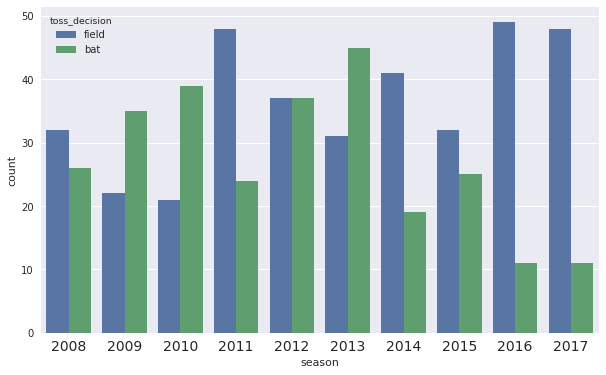

In [17]:
plt.xticks(fontsize=14)
sns.countplot(x='season', hue='toss_decision', data=df)

## Matches played by different teams

Number of matches played by each team :

Mumbai Indians                 157
Royal Challengers Bangalore    150
Kolkata Knight Riders          148
Kings XI Punjab                148
Delhi Daredevils               145
Chennai Super Kings            131
Rajasthan Royals               117
Sunrisers Hyderabad             76
Deccan Chargers                 75
Pune Warriors                   45
Rising Pune Supergiants         30
Gujarat Lions                   30
Kochi Tuskers Kerala            14
dtype: int64



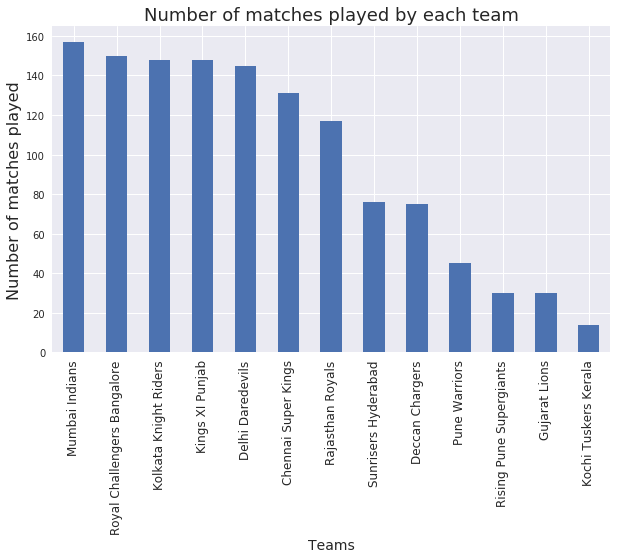

In [18]:
df_team_matches = (df.team1.value_counts() + df.team2.value_counts()).sort_values(ascending=False)
print "Number of matches played by each team :\n\n{}\n".format(df_team_matches)

df_team_matches.plot(kind='bar',figsize=(10,6))

plt.xticks(fontsize=12)
plt.xlabel('Teams',fontsize=14)
plt.ylabel('Number of matches played',fontsize=16)
plt.title('Number of matches played by each team',fontsize=18)

# Matches won by different teams

Number of matches won by each team :

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

Percentage of matches won by each team :

Chennai Super Kings            60.305344
Deccan Chargers                38.666667
Delhi Daredevils               42.758621
Gujarat Lions                  43.333333
Kings XI Punjab                47.297297
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          52.027027
Mumbai Indians                 58.598726
Pune Warriors                  26.666667
Rajasthan Royals               53.846154
Rising Pune Supergiants        50.000000

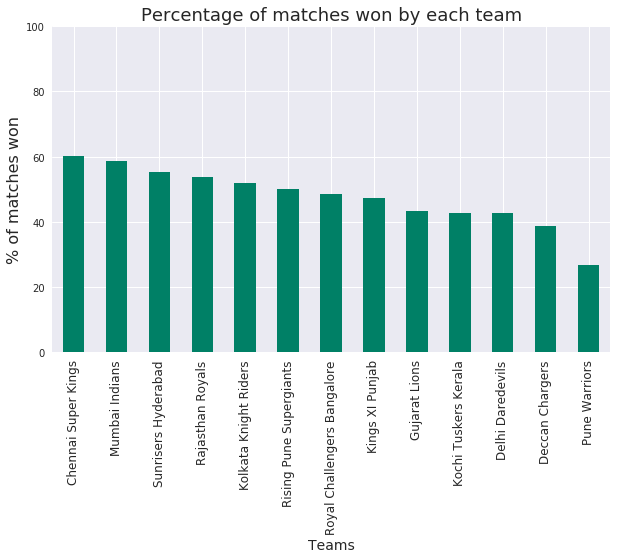

In [19]:
df_winner = df['winner'].value_counts().sort_values(ascending=False)
df_winner_per = 100 * df_winner[all_teams]/ df_team_matches[all_teams]

print "Number of matches won by each team :\n\n{}\n".format(df_winner)
print "Percentage of matches won by each team :\n\n{}\n".format(df_winner_per)

df_winner_per.sort_values(ascending=False).plot(kind='bar',figsize=(10,6), colormap='summer')

plt.xticks(fontsize=12)
plt.ylim(0,100)
plt.xlabel('Teams',fontsize=14)
plt.ylabel('% of matches won',fontsize=16)
plt.title('Percentage of matches won by each team',fontsize=18)

## Percentage of winning the toss

Number of times a team has won the toss : 

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               71
Royal Challengers Bangalore    69
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               62
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

Percentage a team has won the toss : 

Chennai Super Kings            50.381679
Deccan Chargers                57.333333
Delhi Daredevils               48.965517
Gujarat Lions                  50.000000
Kings XI Punjab                45.945946
Kochi Tuskers Kerala           57.142857
Kolkata Knight Riders          52.702703
Mumbai Indians                 54.140127
Pune Warriors                  44.444444
Rajasthan Royals               52.991453
Rising Pune Supergiants        4

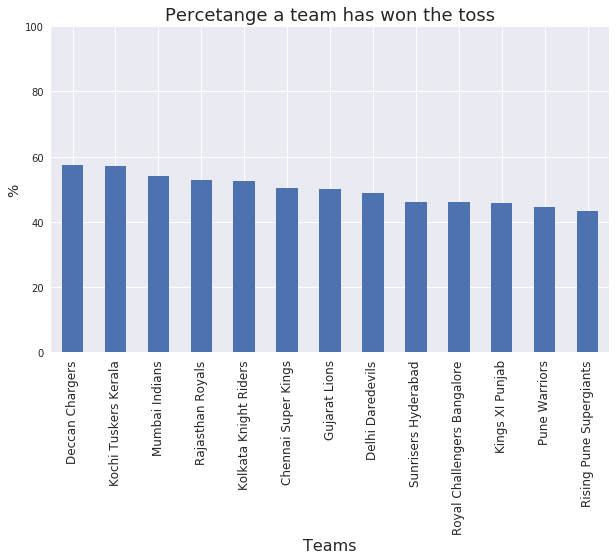

In [20]:
df_toss = df.toss_winner.value_counts()
df_toss_num = df_toss[all_teams].sort_values(ascending=False)
df_toss_per = 100 * df_toss[all_teams]/df_team_matches[all_teams].values

print "Number of times a team has won the toss : \n"
print df_toss_num

print "\nPercentage a team has won the toss : \n"
print df_toss_per

df_toss_per.sort_values(ascending=False).plot(kind='bar',figsize=(10,6))

plt.xticks(fontsize=12)
plt.xlabel('Teams',fontsize=16)
plt.ylim(0,100)
plt.ylabel('%',fontsize=14)
plt.title('Percetange a team has won the toss',fontsize=18)

## Percentage of teams winning the match after winning the toss

Percentage of matches won by teams after winning the toss : 0.513428120063

Number of matches won by teams after winning the toss : 

Mumbai Indians                 48
Kolkata Knight Riders          44
Chennai Super Kings            42
Royal Challengers Bangalore    35
Rajasthan Royals               34
Delhi Daredevils               33
Kings XI Punjab                28
Deccan Chargers                19
Sunrisers Hyderabad            17
Gujarat Lions                  10
Rising Pune Supergiants         8
Kochi Tuskers Kerala            4
Pune Warriors                   3
Name: winner, dtype: int64

Percentage of matches won by teams after winning the toss : 

Chennai Super Kings            32.061069
Deccan Chargers                25.333333
Delhi Daredevils               22.758621
Gujarat Lions                  33.333333
Kings XI Punjab                18.918919
Kochi Tuskers Kerala           28.571429
Kolkata Knight Riders          29.729730
Mumbai Indians                 30.573248
Pune W

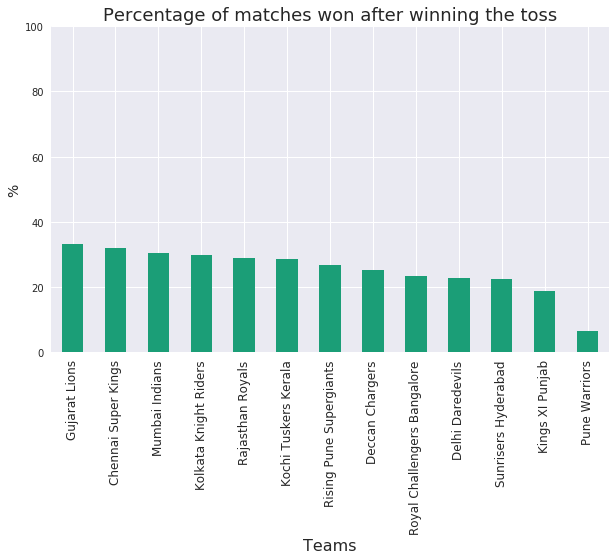

In [21]:
df_toss_winner = df[df.toss_winner == df.winner]['winner']
df_toss_winner_count = df_toss_winner.value_counts()
df_toss_winner_per = 100 * df_toss_winner.value_counts()[all_teams]/df_team_matches[all_teams].values
toss_match_win_per = df_toss_winner.count()/float(df.shape[0])

print "Percentage of matches won by teams after winning the toss : {}\n".format(toss_match_win_per)

print "Number of matches won by teams after winning the toss : \n"
print df_toss_winner_count

print "\nPercentage of matches won by teams after winning the toss : \n"
print df_toss_winner_per

df_toss_winner_per.sort_values(ascending=False).plot(kind='bar',figsize=(10,6),colormap='Dark2')

plt.xticks(fontsize=12)
plt.xlabel('Teams',fontsize=16)
plt.ylim(0,100)
plt.ylabel('%',fontsize=14)
plt.title('Percentage of matches won after winning the toss',fontsize=18)

## Percentage of teams winning the match after winning the toss (field first)

Percentage of matches won by teams after winning the toss and electing to field first : 0.317535545024

Number of matches won by teams after winning the toss and electing to field first: 

Kolkata Knight Riders          29
Mumbai Indians                 26
Royal Challengers Bangalore    26
Delhi Daredevils               23
Kings XI Punjab                23
Rajasthan Royals               21
Chennai Super Kings            13
Sunrisers Hyderabad            10
Gujarat Lions                  10
Deccan Chargers                 8
Rising Pune Supergiants         8
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

Percentage of matches won by teams after winning the toss and electing to field first: 

Chennai Super Kings             9.923664
Deccan Chargers                10.666667
Delhi Daredevils               15.862069
Gujarat Lions                  33.333333
Kings XI Punjab                15.540541
Kochi Tuskers Kerala           28.571429
Kolkata Knight Riders          19.594595

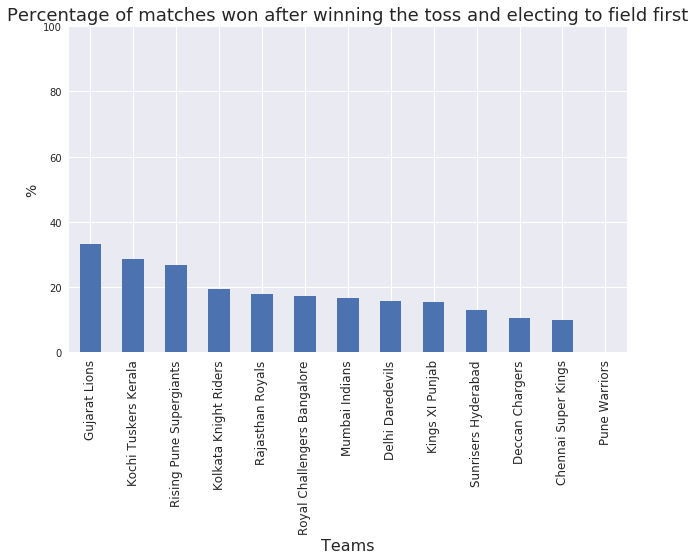

In [22]:
df_toss_winner_field = df[(df.toss_winner == df.winner) & (df.toss_decision == 'field')]['winner']
df_toss_winner_field_count = df_toss_winner_field.value_counts()
df_toss_winner_field_per = 100 * df_toss_winner_field.value_counts()[all_teams]/df_team_matches[all_teams].values
df_toss_winner_field_total_per = df_toss_winner_field.count()/float(df.shape[0])

print "Percentage of matches won by teams after winning the toss and electing to field first : {}\n".format(df_toss_winner_field_total_per)

print "Number of matches won by teams after winning the toss and electing to field first: \n"
print df_toss_winner_field_count

print "\nPercentage of matches won by teams after winning the toss and electing to field first: \n"
print df_toss_winner_field_per

df_toss_winner_field_per.sort_values(ascending=False).plot(kind='bar',figsize=(10,6))

plt.xticks(fontsize=12)
plt.xlabel('Teams',fontsize=16)
plt.ylim(0,100)
plt.ylabel('%',fontsize=14)
plt.title('Percentage of matches won after winning the toss and electing to field first',fontsize=18)

## Percentage of teams winning the match after winning the toss (bat first)

Percentage of matches won by teams after winning the toss and electing to bat first : 0.195892575039

Number of matches won by teams after winning the toss and electing to bat first: 

Chennai Super Kings            29
Mumbai Indians                 22
Kolkata Knight Riders          15
Rajasthan Royals               13
Deccan Chargers                11
Delhi Daredevils               10
Royal Challengers Bangalore     9
Sunrisers Hyderabad             7
Kings XI Punjab                 5
Pune Warriors                   3
Name: winner, dtype: int64

Percentage of matches won by teams after winning the toss and electing to bat first: 

Chennai Super Kings            22.137405
Deccan Chargers                14.666667
Delhi Daredevils                6.896552
Gujarat Lions                        NaN
Kings XI Punjab                 3.378378
Kochi Tuskers Kerala                 NaN
Kolkata Knight Riders          10.135135
Mumbai Indians                 14.012739
Pune Warriors                   

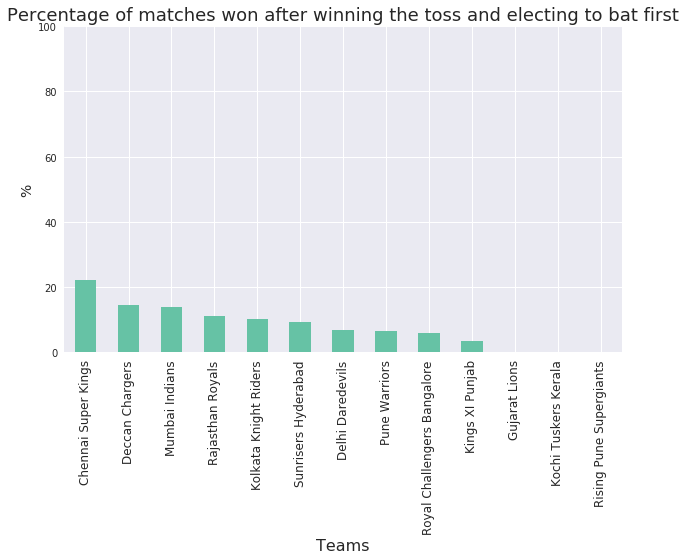

In [23]:
df_toss_winner_bat = df[(df.toss_winner == df.winner) & (df.toss_decision == 'bat')]['winner']
df_toss_winner_bat_count = df_toss_winner_bat.value_counts()
df_toss_winner_bat_per = 100 * df_toss_winner_bat.value_counts()[all_teams]/df_team_matches[all_teams].values
df_toss_winner_bat_total_per = df_toss_winner_bat.count()/float(df.shape[0])

print "Percentage of matches won by teams after winning the toss and electing to bat first : {}\n".format(df_toss_winner_bat_total_per)

print "Number of matches won by teams after winning the toss and electing to bat first: \n"
print df_toss_winner_bat_count

print "\nPercentage of matches won by teams after winning the toss and electing to bat first: \n"
print df_toss_winner_bat_per

df_toss_winner_bat_per.sort_values(ascending=False).plot(kind='bar',figsize=(10,6),colormap='Set2')

plt.xticks(fontsize=12)
plt.xlabel('Teams',fontsize=16)
plt.ylim(0,100)
plt.ylabel('%',fontsize=14)
plt.title('Percentage of matches won after winning the toss and electing to bat first',fontsize=18)

## Heatmap 

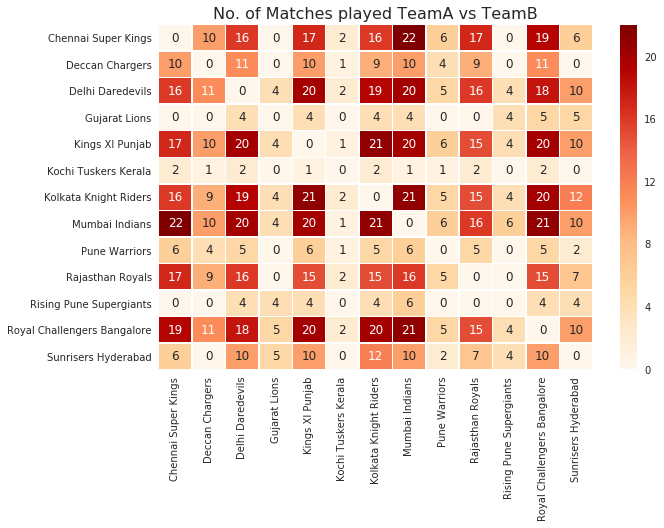

In [24]:
total_teams = len(all_teams)
heatmap_scores = np.zeros((total_teams, total_teams))
for i,team1 in enumerate(all_teams):
    for j,team2 in enumerate(all_teams):
        matches_played = 0
        if team1 != team2:
            df_winner = df[(df.team1 == team1) & (df.team2 == team2)]['winner']
            matches_played = df_winner.shape[0]
            #print team1, team2, matches_played
            heatmap_scores[i,j] += matches_played
            heatmap_scores[j,i] += matches_played
        
fig, ax = plt.subplots(1, 1)
fig.set_figheight(7.5)
fig.set_figwidth(10)

ax1 = sns.heatmap(heatmap_scores, xticklabels = all_teams, yticklabels = all_teams, linewidths = 0.5, annot = True, cmap="OrRd", ax = ax)

ax1.set_title("No. of Matches played TeamA vs TeamB",fontsize=16)

fig.tight_layout()

# Most number of MoMs

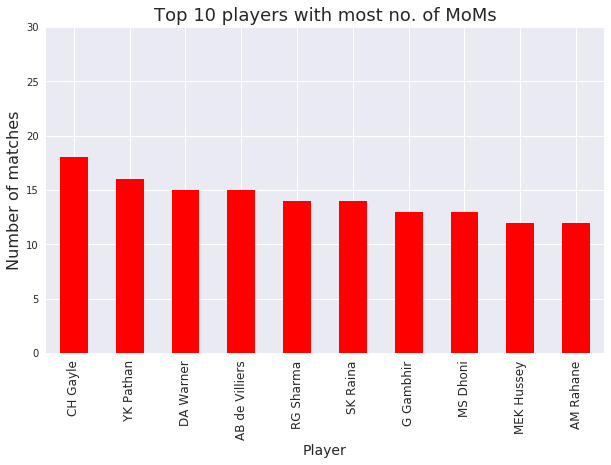

In [25]:
df['player_of_match'].value_counts().head(10).plot.bar(figsize=(10,6), color='R')

plt.xticks(fontsize=12)
plt.ylim(0,30)
plt.xlabel('Player',fontsize=14)
plt.ylabel('Number of matches',fontsize=16)
plt.title('Top 10 players with most no. of MoMs',fontsize=18)